In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [11]:
# Calculate the date one year from the last date in data set.
# Use datetime function to be able to calculate the value 365 days ago
previous_year_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
previous_year_date

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame 
precip_data_df = pd.DataFrame(precip_scores, columns=["Date","Precipitation"])

# Set the index to the date column & sort the dataframe by date
precip_data_df.set_index("Date", inplace = True,)

# Display the df
precip_data_df.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


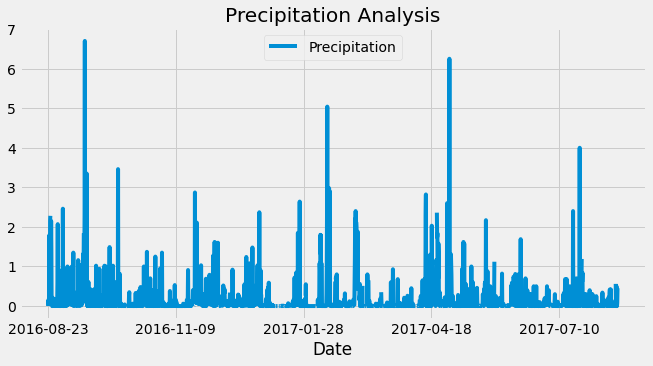

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df.plot(title = "Precipitation Analysis", figsize = (10,5))
plt.legend(loc = 'upper center')

# Save to figure on final run of the code
## plt.savefig("Images/precipitation.png")

plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# This can be done really easily for a database through the .describe() function
precip_data_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
# Using the .distinct() to make sure the same station is not counted multiple times 
num_stations = session.query(Measurement.station).distinct().count()
num_stations


9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

# I don't always do this, but this line of code got very long so I used the \ to split it into a new line
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

temp_calculations = session.query(*sel).filter(Measurement.station == "USC00519281").all()
temp_calculations

[(54.0, 85.0, 71.66378066378067)]

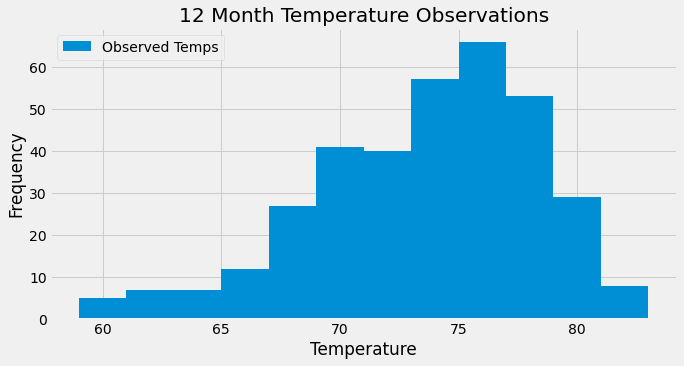

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# I am using a line break here again in this line as it started to get pretty long
temp_data = session.query(Measurement.tobs).filter(Measurement.date >= previous_year_date).filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()

# Save the Query Results as a Pandas DataFrame
temp_data_df = pd.DataFrame(temp_data, columns=["Observed Temps"])

# Plot the Results as a Histogram with `bins=12`
temp_data_df.plot.hist(bins = 12, title = "12 Month Temperature Observations", figsize=(10,5))

# Plot labels and title
plt.xlabel("Temperature")
plt.legend(loc = "best")
#plt.tight_layout()

# Save the image of the graph on the final run through of the code, before submitting
## plt.savefig("Images/temperature_vs_frequency.png")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()